$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "serif"
format_figures = 'pdf'

In [2]:
Path_parton_analysis = os.path.dirname(os.path.realpath('Article_XS.ipynb'))
Path_Leptoquarks_searches = os.path.dirname(Path_parton_analysis)

In [3]:
Path_Leptoquarks_searches

'/home/pheno/2023/Semanas_22_23_24/Leptoquarks_Searches_2023'

In [4]:
Data = pd.read_csv(f'{Path_Leptoquarks_searches}/03_delphes_preselection/Cutflows/hadronic_dLQ.csv', index_col= 0)

In [5]:
Data

,ttbar,stop,z_jets,w_jets,ww,wz,zz,LQ_LQ_1000,LQ_LQ_1250,LQ_LQ_1500,...,Tau_LQ_wo_RHC_2000,Tau_LQ_wo_RHC_2250,Tau_LQ_wo_RHC_2500,Tau_Tau_wo_RHC_1000,Tau_Tau_wo_RHC_1250,Tau_Tau_wo_RHC_1500,Tau_Tau_wo_RHC_1750,Tau_Tau_wo_RHC_2000,Tau_Tau_wo_RHC_2250,Tau_Tau_wo_RHC_2500
XS,5.046960e+02,241.17,43029.27,146548.3,6.550736e+01,2.469184e+01,9.562416e+00,0.19567,0.033018,0.006541,...,0.000301,0.000106,0.000039,0.04198,0.01707,0.008189,0.004485,0.002816,0.002013,0.001612
All,2.430725e+07,11500000.00,18505572.00,20942823.0,1.250000e+07,9.850000e+06,1.000000e+07,600000.00000,600000.000000,600000.000000,...,800000.000000,800000.000000,800000.000000,150000.00000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
Maximum 1 light lepton,2.402979e+07,11463684.00,18232829.00,20942816.0,1.238944e+07,9.674837e+06,9.697543e+06,579636.00000,579652.000000,579698.000000,...,769782.000000,770191.000000,770967.000000,145007.00000,144839.00000,144734.000000,144322.000000,143981.000000,143697.000000,143549.000000
At least 2 leptons,1.472470e+05,28042.00,2413.00,2083.0,2.592700e+04,1.655200e+04,1.477700e+04,100409.00000,100893.000000,99726.000000,...,144937.000000,143762.000000,143550.000000,29007.00000,30329.00000,31320.000000,32466.000000,33372.000000,34838.000000,35421.000000
Exactly 2 leptons,1.458060e+05,27827.00,2407.00,2077.0,2.586200e+04,1.632700e+04,1.453000e+04,97457.00000,97798.000000,96517.000000,...,141539.000000,140525.000000,140219.000000,28829.00000,30142.00000,31129.000000,32275.000000,33138.000000,34597.000000,35183.000000
hadronic selection,1.613900e+04,3472.00,760.00,272.0,1.866000e+03,2.495000e+03,4.200000e+03,41381.00000,41535.000000,40998.000000,...,59340.000000,59000.000000,59252.000000,13030.00000,13744.00000,13870.000000,14367.000000,14766.000000,15245.000000,15306.000000
dLQ selection,3.047000e+03,287.00,4.00,1.0,6.000000e+00,1.300000e+01,9.000000e+01,18557.00000,18708.000000,18637.000000,...,9676.000000,9900.000000,9614.000000,367.00000,381.00000,416.000000,425.000000,449.000000,488.000000,479.000000
DeltaR > 0.3,3.047000e+03,287.00,4.00,1.0,6.000000e+00,1.300000e+01,9.000000e+01,18557.00000,18708.000000,18637.000000,...,9676.000000,9900.000000,9614.000000,367.00000,381.00000,416.000000,425.000000,449.000000,488.000000,479.000000


In [6]:
Signals = ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']
Masses = ['1000', '1250', '1500', '1750', '2000', '2250', '2500']

Suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
betard_label = {'wRHC': r'$\beta_{R} = -1$', 'woRHC': r'$\beta_{R} = 0$'}
linestyle_by_betard = {'wRHC': '-', 'woRHC': '--'}

colors = {'LQ_LQ_wRHC': 'orange', 
          'Tau_LQ_wRHC': 'blue', 
          'Tau_Tau_wRHC': 'green', 
          'LQ_LQ_woRHC': 'red', 
          'Tau_LQ_woRHC': 'dodgerblue', 
          'Tau_Tau_woRHC': 'limegreen'}

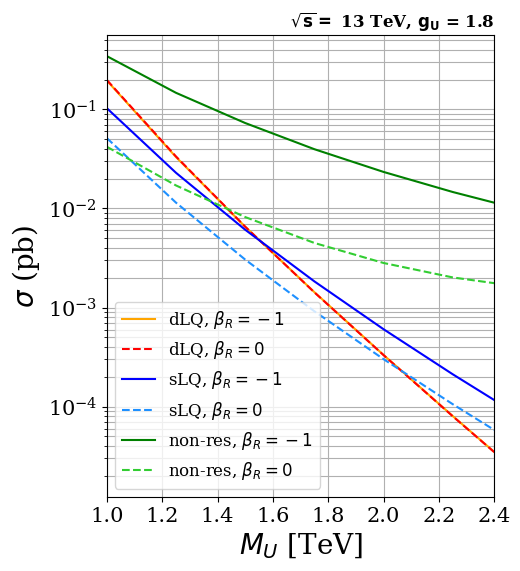

In [10]:
X = [float(M)/1000 for M in Masses]

fig = plt.figure(figsize = (5,6))

for signal in Signals:
    for betard in Suffix_by_betard.keys():
        # etiqueta = signal.replace('Tau_LQ', r'sLQ : p p $\rightarrow \tau$ lq').replace('LQ_LQ', r'dLQ : p p $\rightarrow$ lq lq').replace('Tau_Tau', r'non-res : p p $\rightarrow \tau \tau$') + f', {betard_label[betard]}'
        etiqueta = signal.replace('Tau_LQ', r'sLQ').replace('LQ_LQ', r'dLQ').replace('Tau_Tau', r'non-res') + f', {betard_label[betard]}'
        Y = [ Data[f'{signal}{Suffix_by_betard[betard]}_{M}']['XS'] for M in Masses]
        plt.semilogy(X, Y, linestyle = linestyle_by_betard[betard], label = etiqueta, color = colors[f'{signal}_{betard}']) 
        
plt.xlim(1,2.4)
# plt.xlabel(r'$m(LQ)$ [TeV]', loc= 'right', fontsize = 20)
plt.xlabel(r'$M_{U}$ [TeV]', fontsize = 20)

plt.ylabel(r'$\sigma $ (pb)', fontsize = 20)
plt.grid(True, which="both")

plt.legend(fontsize = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.title(r'$\mathbf{\sqrt{s} =}$ 13 TeV, $\mathbf{g_{U}}$ = 1.8', fontweight='bold', loc = 'right', fontsize = 12)
plt.savefig(f'prod_cross_section_13TeV.pdf', bbox_inches='tight')